In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk import PorterStemmer, word_tokenize
from nltk.corpus import stopwords

data = pd.read_pickle('assets/preprocessed_data.pkl')
data

0        carina tofuveget kebab extra firm tofu eggplan...
1        blackbottom pie graham cracker crumb sugar but...
2        carrot cake arrot egg white sugar allpurpos fl...
3        almond pound cake butter almond past sugar egg...
4        blueberri buttertart egg corn syrup lemon juic...
                               ...                        
28009    pork tenderloin bacononion jam oliv oil red on...
28010    thai basil chicken gai pad krapow shallot garl...
28011    green enchilada chicken soup boneless skinless...
28012    keto king bread flax seed meal vital wheat glu...
28013    butter pecan banana muffin pecan unsalt butter...
Name: Merged, Length: 28014, dtype: object

In [39]:
def preProcess(s):
    if not isinstance(s, str):
        return ""

    ps = PorterStemmer()
    s = word_tokenize(s)
    stopwords_set = set(stopwords.words())
    s = [w for w in s if w not in stopwords_set]
    s = [ps.stem(w) for w in s]
    s = ' '.join(s)
    return s

In [40]:
# data.apply(preProcess)

In [41]:
def train_kmeans_model(preprocessed_data, num_clusters=5):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(preprocessed_data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    return kmeans

In [42]:
def suggest_recipes(user_query, kmeans_model, vectorizer, data, num_recommendations=5):
    # Preprocess user query
    preprocessed_query = preProcess(user_query)
    query_vector = vectorizer.transform([preprocessed_query])

    cluster_label = kmeans_model.predict(query_vector)[0]

    cluster_indices = (kmeans_model.labels_ == cluster_label)
    cluster_recipes = data[cluster_indices]

    return cluster_recipes.sample(min(num_recommendations, len(cluster_recipes)))

In [44]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data)
kmeans_model = train_kmeans_model(data)
        
user_query = "cake"
recommendations = suggest_recipes(user_query, kmeans_model, vectorizer, data)
print("Recommended Recipes:")
print(recommendations)

/Users/mahsoomsateemae/anaconda3/envs/Recipe_bookmark/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recommended Recipes:
23511    healthi zucchini carrot spice bread zucchini c...
26417    low carb low sugar red velvet cheesecak bar un...
23473    copycat buttermilk pancak flour splenda sugar ...
24369    applesauc banana muffin banana applesauc egg m...
507      upright pineappl cake butter mandarin orang je...
Name: Merged, dtype: object


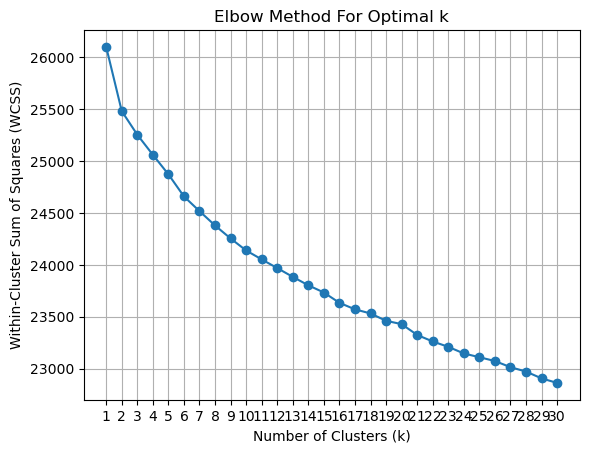

In [46]:
import matplotlib.pyplot as plt

def train_kmeans_model_with_elbow(preprocessed_data, max_clusters=30):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(preprocessed_data)
    
    # Initialize lists to store WCSS values for different k
    wcss = []

    # Loop over a range of k values
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(tfidf_matrix)
        wcss.append(kmeans.inertia_)  # Sum of squared distances to closest centroid (WCSS)

    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

    return vectorizer, kmeans

# Train KMeans model with elbow method
vectorizer_elbow, kmeans_model_elbow = train_kmeans_model_with_elbow(data)
